In [57]:
import numpy as np
import scipy.special
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [58]:
adaYellow=(245,225,52)
adaPurple=(149,96,159)
adaGreen=(161,200,84)
adaCoral=(236,98,113)
adaBlue=(108,184,231)
adaOrange=(246,131,82)

adaBlack=(9,20,8)
adaGrey=(134,136,140)
adaLightGrey=(211,212,211)
adaWhite=(255,255,255)

# matplotlib wants 0-1 not 0-255
def nrm(c):
    return list(map(lambda x: x/255, c))

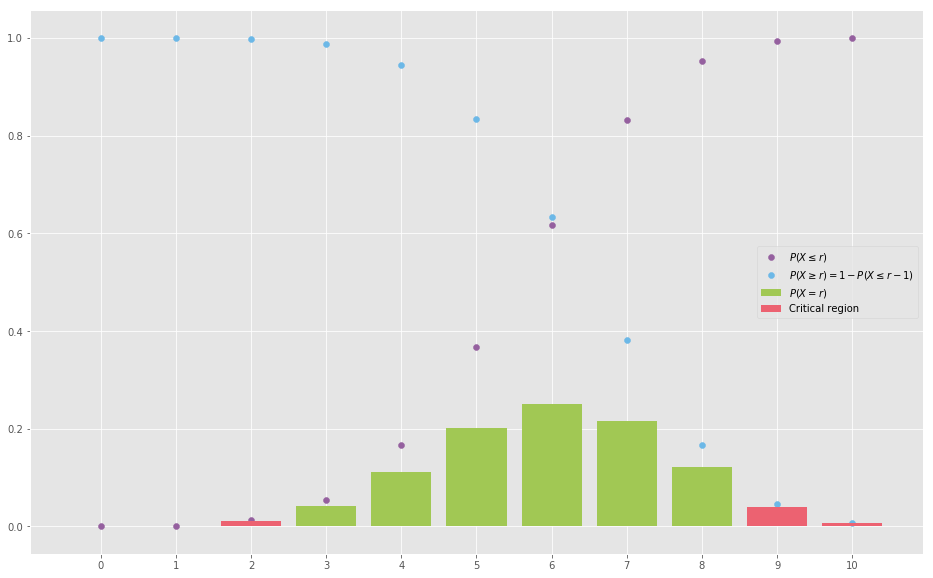

In [68]:
def binomial(n=7, p=0.5, s=0.05, tail="left"):
    
    # r=0, 1, 2, ..., n
    rs = np.arange(0,n+1)
    # Probability P(X=r)
    ps = binom.pmf(rs,n,p)
    # Cumulative probability P(X<=r)
    cs = binom.cdf(rs,n,p)
    # From the other end P(X>=r)=1-P(X<=r-1)
    ds = 1-binom.cdf(rs-1,n,p)

    # Define critical region
    if tail=="left":
        indices = cs < s
    elif tail=="right":
        indices = ds < s
    elif tail=="both":
        indices = np.logical_or(cs < s/2, ds < s/2)
    
    f, ax = plt.subplots()
    f.set_figwidth(16)
    f.set_figheight(10)

    ax.set_xticks(rs)
    ax.scatter(rs, cs, c=nrm(adaPurple), label="$P(X\leq r)$")
    ax.scatter(rs, ds, c=nrm(adaBlue), label="$P(X\geq r)=1-P(X\leq r-1)$")
    ax.bar(rs[~indices], ps[~indices], color=nrm(adaGreen), label="$P(X=r)$")
    ax.bar(rs[indices], ps[indices], color=nrm(adaCoral), label="Critical region")

    ax.legend()
    
    return ax
binomial(10,3/5,0.1,"both");